Principal Component Analysis is a dimensionality reduction technique that gives us a linear combination of variables. It is required to mean-center the data before we proceed with PCA (sklearn's PCA does this automatically).  We will use the wine dataset from UCI. The data may be obtained from: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/
Reference: Machine Learning with PyTorch and Scikit-Learn by Sebastian Raschka, Yuxi Liu, and Vahid Mirjalili, Packt Publishing

In [3]:
import pandas as pd
wine_df = pd.read_csv('wine.data', header = None)

In [4]:
wine_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
columns = ["Class","Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids",
           "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines",
           "Proline"]

In [10]:
wine_df.columns = columns
wine_df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
wine_df.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X = wine_df[wine_df.columns[1:]]
y = wine_df['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 9)

In [13]:
#We need to mean-center the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [15]:
#Get the covariance matrix and then the eigen values and corresponding eigenvectors
import numpy as np
cov = np.cov(x_train_std.T)
eig_values, eig_vectors = np.linalg.eig(cov)
print("Eigenvalues: \n", eig_values)

Eigenvalues: 
 [4.64658305 2.70551727 1.29789865 1.01926855 0.91207305 0.62223369
 0.53988252 0.08654865 0.16713474 0.34888518 0.29537036 0.21261867
 0.25167668]


In [20]:
eig_vectors

array([[-0.18299752,  0.45575983, -0.12403581,  0.09138082, -0.1959389 ,
        -0.28637442,  0.21483343, -0.03059134, -0.25462611,  0.08458336,
        -0.62357031, -0.32115726,  0.05997699],
       [ 0.21824215,  0.2537581 ,  0.1056442 , -0.50193376,  0.19929981,
        -0.60389825, -0.2901181 ,  0.01994085,  0.12741349, -0.10298512,
        -0.04394204,  0.17908079, -0.27396783],
       [ 0.00293782,  0.32265039,  0.65237055,  0.25916802,  0.03134141,
        -0.07402918,  0.10974811, -0.14210856, -0.04387578,  0.00606101,
         0.41129729, -0.38873324, -0.20540155],
       [ 0.26873231, -0.00456795,  0.607536  , -0.10864579, -0.01252644,
         0.2401683 ,  0.27875471,  0.08842337, -0.08867024, -0.11815727,
        -0.41680845,  0.42547931,  0.16404905],
       [-0.09591418,  0.34144548,  0.01337767,  0.24150804,  0.68993371,
         0.24466247, -0.39019985,  0.10287721,  0.01397478,  0.23839543,
        -0.15305279,  0.07459484,  0.17602628],
       [-0.39751939,  0.044672

In [17]:
#let us get the fraction of the total variance explained by each component
variance_explained = eig_values/sum(eig_values)
variance_explained

array([0.35454697, 0.20643835, 0.09903321, 0.07777297, 0.06959366,
       0.04747813, 0.04119451, 0.0066039 , 0.01275284, 0.02662089,
       0.02253756, 0.01622338, 0.01920362])

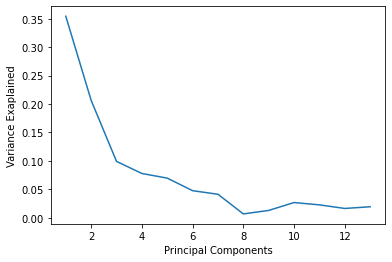

In [18]:
#let us plot this
import matplotlib.pyplot as plt
plt.plot(range(1, len(variance_explained) + 1), variance_explained)
plt.ylabel("Variance Exaplained")
plt.xlabel("Principal Components")
plt.show()

In [21]:
#Elbow appears to be at 3, or is it 4? Let us take 3 --> total variance explained is about 64%
pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]
pairs.sort(key = lambda x: x[0], reverse = True)
pairs


[(4.646583049398583,
  array([-0.18299752,  0.21824215,  0.00293782,  0.26873231, -0.09591418,
         -0.39751939, -0.43635051,  0.30134747, -0.31237834,  0.06841853,
         -0.27992332, -0.37780725, -0.27361766])),
 (2.705517267865207,
  array([ 0.45575983,  0.2537581 ,  0.32265039, -0.00456795,  0.34144548,
          0.04467294, -0.0128951 ,  0.03765126,  0.04737477,  0.50688822,
         -0.29478396, -0.15672035,  0.3646398 ])),
 (1.2978986457960775,
  array([-0.12403581,  0.1056442 ,  0.65237055,  0.607536  ,  0.01337767,
          0.12452086,  0.12822091,  0.13839462,  0.15726047, -0.15801946,
          0.14778387,  0.20434033, -0.11913424])),
 (1.0192685532594714,
  array([ 0.09138082, -0.50193376,  0.25916802, -0.10864579,  0.24150804,
         -0.15720128, -0.09912298,  0.27452165, -0.43564154, -0.09368322,
          0.45421491, -0.15005609,  0.25519812])),
 (0.9120730457483671,
  array([-0.1959389 ,  0.19929981,  0.03134141, -0.01252644,  0.68993371,
         -0.20321613, 

In [23]:
w = np.hstack((pairs[0][1][:, np.newaxis],
              pairs[1][1][:, np.newaxis],
              pairs[2][1][:, np.newaxis]))
w

array([[-0.18299752,  0.45575983, -0.12403581],
       [ 0.21824215,  0.2537581 ,  0.1056442 ],
       [ 0.00293782,  0.32265039,  0.65237055],
       [ 0.26873231, -0.00456795,  0.607536  ],
       [-0.09591418,  0.34144548,  0.01337767],
       [-0.39751939,  0.04467294,  0.12452086],
       [-0.43635051, -0.0128951 ,  0.12822091],
       [ 0.30134747,  0.03765126,  0.13839462],
       [-0.31237834,  0.04737477,  0.15726047],
       [ 0.06841853,  0.50688822, -0.15801946],
       [-0.27992332, -0.29478396,  0.14778387],
       [-0.37780725, -0.15672035,  0.20434033],
       [-0.27361766,  0.3646398 , -0.11913424]])

In [26]:
eig_vectors[:,:3]

array([[-0.18299752,  0.45575983, -0.12403581],
       [ 0.21824215,  0.2537581 ,  0.1056442 ],
       [ 0.00293782,  0.32265039,  0.65237055],
       [ 0.26873231, -0.00456795,  0.607536  ],
       [-0.09591418,  0.34144548,  0.01337767],
       [-0.39751939,  0.04467294,  0.12452086],
       [-0.43635051, -0.0128951 ,  0.12822091],
       [ 0.30134747,  0.03765126,  0.13839462],
       [-0.31237834,  0.04737477,  0.15726047],
       [ 0.06841853,  0.50688822, -0.15801946],
       [-0.27992332, -0.29478396,  0.14778387],
       [-0.37780725, -0.15672035,  0.20434033],
       [-0.27361766,  0.3646398 , -0.11913424]])

In [27]:
#Let us now transform the original matrix onto the 3 principal components
x_train_pca = x_train_std.dot(w)
x_train_pca

array([[ 2.21407988,  1.26453843, -0.10930965],
       [-0.87903832, -0.73879551,  0.54892777],
       [-1.98423334,  0.16012827,  0.5838038 ],
       [-3.37344348,  0.0768528 , -1.92210674],
       [ 0.51774091, -2.14964011, -0.31989585],
       [ 1.61327756, -1.31714307, -1.02362108],
       [-0.97654893, -2.18606145,  0.09585752],
       [-1.1217394 , -1.41008089,  1.58697817],
       [ 2.40195782,  0.38540197,  1.21245358],
       [-1.43039307,  0.76045754,  0.54858489],
       [-2.37307179,  1.67674597,  0.27775249],
       [ 3.09695052,  2.78835884,  1.04763724],
       [-4.51813647,  2.00735949, -1.13629708],
       [ 2.14648842,  0.47949769, -0.56530608],
       [ 1.96278858, -1.56962509, -0.01728459],
       [-0.73541657, -3.41588731, -0.2527618 ],
       [-0.76993062, -2.00434499, -0.18360783],
       [ 2.51087021,  2.12972549, -0.58766091],
       [-2.88870487,  1.44728884, -0.64676561],
       [ 1.72365711, -1.09720998,  0.85596101],
       [ 2.37006511,  0.46750688, -0.826

In [29]:
#Let us use sklearn's PCA to verify our results
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
x_train_pca_1 = pca.fit_transform(x_train_std)
x_train_pca_1

array([[-2.21407988, -1.26453843,  0.10930965],
       [ 0.87903832,  0.73879551, -0.54892777],
       [ 1.98423334, -0.16012827, -0.5838038 ],
       [ 3.37344348, -0.0768528 ,  1.92210674],
       [-0.51774091,  2.14964011,  0.31989585],
       [-1.61327756,  1.31714307,  1.02362108],
       [ 0.97654893,  2.18606145, -0.09585752],
       [ 1.1217394 ,  1.41008089, -1.58697817],
       [-2.40195782, -0.38540197, -1.21245358],
       [ 1.43039307, -0.76045754, -0.54858489],
       [ 2.37307179, -1.67674597, -0.27775249],
       [-3.09695052, -2.78835884, -1.04763724],
       [ 4.51813647, -2.00735949,  1.13629708],
       [-2.14648842, -0.47949769,  0.56530608],
       [-1.96278858,  1.56962509,  0.01728459],
       [ 0.73541657,  3.41588731,  0.2527618 ],
       [ 0.76993062,  2.00434499,  0.18360783],
       [-2.51087021, -2.12972549,  0.58766091],
       [ 2.88870487, -1.44728884,  0.64676561],
       [-1.72365711,  1.09720998, -0.85596101],
       [-2.37006511, -0.46750688,  0.826